# Binary Classification to predict if Salary is greater than $50K

I Putu Krisna Dharma Saputra/2301924353

Arsitektur baseline terdiri dari n node pada input layer, 2 neuron pada hidden layer dan 1 neuron pada output layer (n, 2, 1) dengan n adalah jumlah input yang digunakan.

Sekarang, kita akan membuat model baru BPNN yang mampu menangani tugas klasifikasi biner. Dataset diambil dari dataset Pendapatan di Kaggle (https://www.kaggle.com/mastmustu/income ). 

Dari dataset yang telah saya download, kita akan mengklasifikasi orang yang memiliki income diatas 50k.

Pertama kita akan mengimport library yang akan kita gunakan

In [1]:
# data processing, CSV file I/O
import pandas as pd  
# linear algebra
import numpy as np 
# Plotting accuracy
import matplotlib.pyplot as plt
# Preprocessing: Encoding and scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler 
# Splittiing dataset
from sklearn.model_selection import train_test_split
# Creating model
from tensorflow.keras.models import Sequential
# Creating layer
from tensorflow.keras.layers import Dense
# find precision, recall, F1-score, and accuracy
from sklearn.metrics import classification_report
# Confusion matrix
import seaborn as sns

Terdapat 2 file csv yang akan kita load yaitu train.csv dan test.csv

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

Kita akan melihat insight dari setiap dataset

In [3]:
data_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
data_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


Seperti yang kita lihat diatas, kolom income_>50K tidak ada di test dataset, sehingga untuk melatih model, kita akan menggunakan data train. Data test akan kita gunakan untuk menguji model diakhir.

Kemudian kita akan mengecek data null pada train dataset

In [6]:
data_train.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

Bisa kita lihat diatas hanya 3 kolom yang memiliki data yang hilang yaitu workclass, occupation, dan native_country

Dataset ini berisi banyak sekali informasi, namun kita hanya akan memilih beberapa kolom yang akan dijadikan feature. Untuk memilih feature mana yang akan kita gunakan, kita akan mengecek korelasinya.  

In [7]:
data_train.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.000000,-0.076895,0.034711,0.075839,0.056635,0.070949,0.230988
fnlwgt,-0.076895,1.000000,-0.040696,-0.003357,-0.006303,-0.011642,-0.006852
educational-num,0.034711,-0.040696,1.000000,0.126740,0.081004,0.145670,0.334035
capital-gain,0.075839,-0.003357,0.126740,1.000000,-0.031507,0.082729,0.223325
capital-loss,0.056635,-0.006303,0.081004,-0.031507,1.000000,0.055112,0.145250
hours-per-week,0.070949,-0.011642,0.145670,0.082729,0.055112,1.000000,0.227918
income_>50K,0.230988,-0.006852,0.334035,0.223325,0.145250,0.227918,1.000000


Jika ada fitur yang korelasinya terlalu tinggi, kita perlu membuang salah satunya karena hal ini membuat feature menjadi 
tidak seimbang. Biasanya korelasi yang tergolong tinggi adalah yang nilainya lebih dari 0.8. 
Dapat kita lihat, tidak ada korelasi yang terlalu tinggi.

kemudian kita akan memisah target dan featurenya, dimana targetnya adalah kolom income_>50k dan sisanya adalah feature.

In [8]:
target = data_train.iloc[:,-1:]
feature = data_train.iloc[:,:-1]

In [9]:
target

,income_>50K
0,1
1,0
2,1
3,0
4,0
...,...
43952,1
43953,0
43954,0
43955,0


In [10]:
feature

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States


Pada feature kita bisa lihat terdapat beberapa kolom yang datanya masih berupa categorical seperti wworkclass, education, dan marital-status. Untuk mengubahnya menjadi numerik, kita perlu melakukan yang namanya encoding.

In [11]:
le = LabelEncoder()

feature = feature.apply(lambda col: le.fit_transform(col.astype(str)))
feature

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,50,3,20970,10,7,0,3,1,4,1,121,0,56,38
1,0,3,14899,2,14,4,7,3,4,1,0,0,6,38
2,14,3,7403,9,4,2,3,0,4,1,0,0,34,38
3,41,6,1061,5,10,2,13,0,4,1,0,0,34,38
4,8,6,4727,15,1,4,7,1,2,1,0,0,34,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,35,3,24677,9,4,2,3,0,4,1,0,0,45,38
43953,2,3,1724,11,15,4,7,3,4,0,0,0,34,38
43954,13,3,10632,15,1,0,11,1,4,1,0,0,53,38
43955,29,3,26434,9,4,4,11,1,4,0,0,0,28,38


bisa kita lihat semua datanya sudah menjadi numerikal

Selanjutnya kita akan melakukan scaling. Scaling ini dilakukan untuk menyamakan rentang nilai dari setiap feature. Ada beberapa tipe scaling seperti MinMaxScaler, StandardScaler, dan RobustScaler. Saat ini kita akan menggunakan standard scaler.

In [12]:
scaler = StandardScaler()
feature = scaler.fit_transform(feature)

In [13]:
feature

array([[ 2.06657533, -0.24088197,  1.07095633, ..., -0.20065382,
         1.60310504,  0.2512409 ],
       [-1.57395976, -0.24088197,  0.2807017 , ..., -0.20065382,
        -2.21670421,  0.2512409 ],
       [-0.55460993, -0.24088197, -0.69504345, ..., -0.20065382,
        -0.07761103,  0.2512409 ],
       ...,
       [-0.62742064, -0.24088197, -0.27472847, ..., -0.20065382,
         1.37391648,  0.2512409 ],
       [ 0.53755059, -0.24088197,  1.78219852, ..., -0.20065382,
        -0.53598814,  0.2512409 ],
       [-0.62742064, -0.24088197,  1.10636224, ..., -0.20065382,
        -0.07761103,  0.2512409 ]])

Selanjutnya kita akan membagi dataset menjadi training dan testing dengan test size sebesar 20%. 
Validation set akan kita bagi nanti  

In [14]:
train_X, test_X, train_y, test_y = train_test_split(feature, target, test_size=0.2)

Untuk mencari tahu berapa n input layer yang akan kita gunakan, kita akan mengecek shape dari feature terlebih dahulu. 

In [15]:
feature.shape

(43957, 14)

Dari hasil diatas, kita akan menggunakan 14 sebagai input layernya.

Sekarang kita akan membuat model berdasarkan baseline architecture (n,2,1). Pada layer input dan hidden kita menggunakan relu sebagai activation function dan pada layer output kita menggunakan sigmoid.

In [16]:
model = Sequential()

# 14 layer input 
model.add(Dense(14, input_shape=(14,),activation='relu'))
# 2 layer hidden 
model.add(Dense(2, activation='relu'))
# 1 layer output
model.add(Dense(1, activation='sigmoid'))

Selanjutnya kita akan memilih lost function. Karena output classification kita bersifat binary, kita akan memilih binary crossentrop sebagai lost function dengan menggunakan adam optimizer.

In [17]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Training
Kita akan menggunakan epoch sebesar 50, dan validation set sebesar 20%

In [18]:
history = model.fit(feature,target,epochs = 50, validation_split=0.2)

Epoch 1/50
1099/1099 [==============================] - 5s 4ms/step - loss: 0.5037 - accuracy: 0.7595 - val_loss: 0.3976 - val_accuracy: 0.8157
Epoch 2/50
1099/1099 [==============================] - 2s 2ms/step - loss: 0.3888 - accuracy: 0.8181 - val_loss: 0.3762 - val_accuracy: 0.8290
Epoch 3/50
1099/1099 [==============================] - 1s 1ms/step - loss: 0.3758 - accuracy: 0.8246 - val_loss: 0.3685 - val_accuracy: 0.8311
Epoch 4/50
1099/1099 [==============================] - 1s 1ms/step - loss: 0.3685 - accuracy: 0.8267 - val_loss: 0.3633 - val_accuracy: 0.8339
Epoch 5/50
1099/1099 [==============================] - 1s 1ms/step - loss: 0.3667 - accuracy: 0.8274 - val_loss: 0.3586 - val_accuracy: 0.8361
Epoch 6/50
1099/1099 [==============================] - 1s 1ms/step - loss: 0.3586 - accuracy: 0.8324 - val_loss: 0.3572 - val_accuracy: 0.8388
Epoch 7/50
1099/1099 [==============================] - 1s 1ms/step - loss: 0.3516 - accuracy: 0.8384 - val_loss: 0.3547 - val_accuracy:

Akurasi yang kita dapatkan dari model cukup baik, yaitu rata-rata sebesar 84%

Kemudian kita akan membandingkan akurasi training dan validation

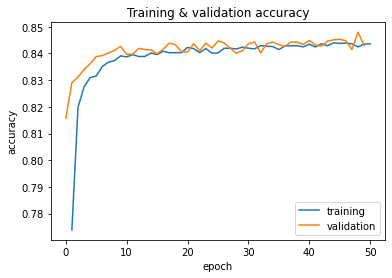

In [19]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs,history.history['accuracy'],history.history['val_accuracy'])
plt.title('Training & validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','validation'])
plt.show()

Akurasi dari training dan validation diatas cukup baik

Precision, recall, F1-score

In [20]:
target_pred = model.predict(test_X)
target_pred = np.around(target_pred).reshape(-1).astype(int)

print(classification_report(test_y, target_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6688
           1       0.70      0.60      0.65      2104

    accuracy                           0.84      8792
   macro avg       0.79      0.76      0.77      8792
weighted avg       0.84      0.84      0.84      8792



Kemudian kita akan menghitung loss dan akurasi dari model

In [21]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f"Loss = {loss}")
print(f"Accuracy = {round(accuracy*100,2)}%")

Loss = 0.33838367462158203
Accuracy = 84.19%


Confusion Matrix

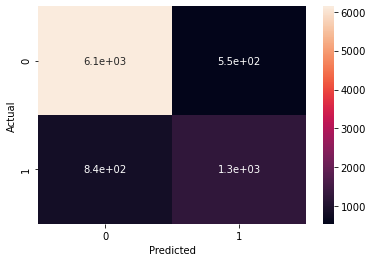

In [22]:
test_y = test_y.values.reshape(-1)

confusion_matrix = pd.crosstab(test_y, target_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Sekarang kita akan mengetes test data dengan model yang telah kita buat. Kita akan preprocessing data test terlebih dahulu.

In [23]:
testing = data_test.apply(le.fit_transform)
testing = scaler.fit_transform(testing)

Data telah siap untuk diprediksi oleh model

In [24]:
Prediction = model.predict(testing)
Prediction = np.around(Prediction).reshape(-1).astype(int)

Sekarang kita akan menampilkan kolom pada test dataset

In [25]:
data_test['Prediction'] = Prediction

data_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Prediction
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal,0
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States,0
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,1
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,0
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,0
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,0
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
